<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/01_Tensor_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vector, Matrix and Tensor**
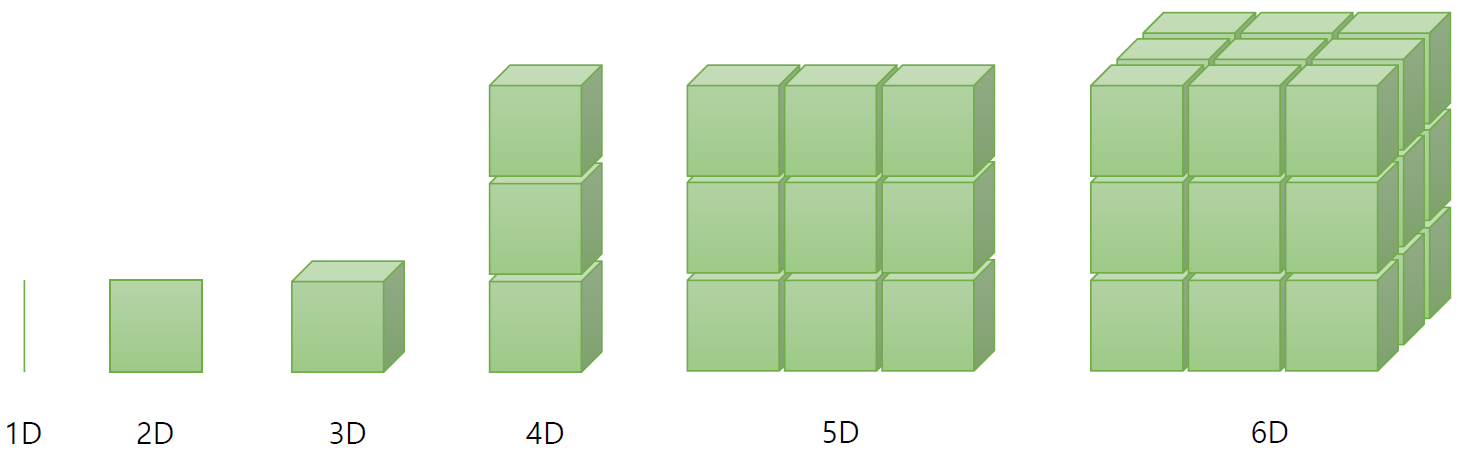

2D Tensor (Typical simple setting)

`|t|=(batch size, dim)`

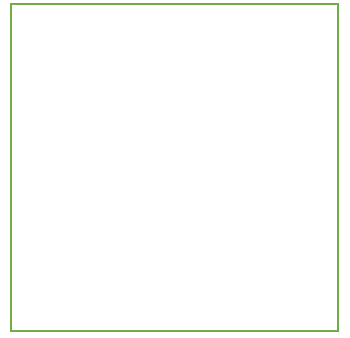

3D Tensor (Typical Computer Vision)

`|t|=(batch size, channel=1, width, height)`

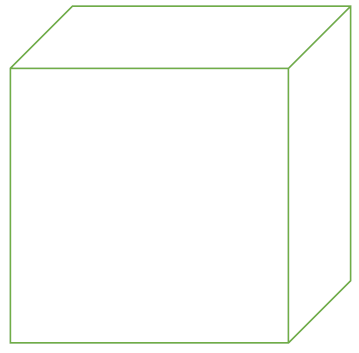

3D Tensor (Typical Naturall Language Processing)

`|t|=(batch size, length, dim)`

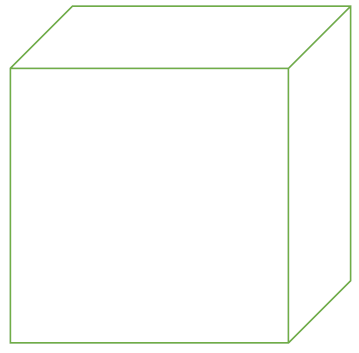

`dim`?

dim 이란 Numpy, Pytorch, TensorFlow에서 자주 사용되는 용어로 차원이라는 뜻이다. 일반적으로 `dim = 0` 은 행(row)을, `dim = 1` 은 열(column)을 가리킨다.


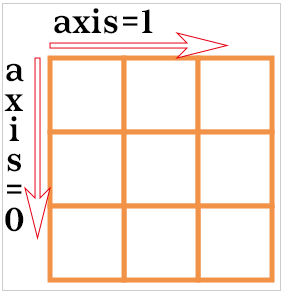

# Import

In [ ]:
import numpy as np
import torch

# Numpy Review

**1D Array with Numpy**

In [ ]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [ ]:
print('Rank of t: ', t.ndim)    # rank
print('shape of t: ', t.shape)  # shape

Rank of t:  1
shape of t:  (7,)


In [ ]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1])  # Element
print('t[2:5] t[4:-1] = ', t[2:5], t[4:-1])     # Slicing
print('t[:2] t[3:] = ', t[:2], t[3:])           # Slicing

t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5] t[4:-1] =  [2. 3. 4.] [4. 5.]
t[:2] t[3:] =  [0. 1.] [3. 4. 5. 6.]


**2D Array with Numpy**

In [ ]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [ ]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


# PyTorch is like NumPy (but better)

**1D Array with PyTorch**

In [ ]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [ ]:
print(t.dim())  # rank
print(t.shape)  # shape
print(t.size()) # shape
print(t[0], t[1], t[-1])  # Element
print(t[2:5], t[4:-1])    # Slicing
print(t[:2], t[3:])       # Slicing

1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


**2D Array with PyTorch**

In [ ]:
t = torch.FloatTensor([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
print(t.dim())  # rank
print(t.size()) # shape
print(t[:, 1])
print(t[:, 1].size())
print(t[:, :-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


**Shape, Rank, Axis**

In [ ]:
t = torch.FloatTensor([[[[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12]],
                       [[13, 14, 15, 16],
                        [17, 18, 19, 20],
                        [21, 22, 23, 24]]
                       ]])
print(t)

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.]],

         [[13., 14., 15., 16.],
          [17., 18., 19., 20.],
          [21., 22., 23., 24.]]]])


In [ ]:
print(t.dim())  # rank  = 4
print(t.size()) # shape = (1, 2, 3, 4)

4
torch.Size([1, 2, 3, 4])


**Mul vs. Matmul**

In [ ]:
print('-------------')
print('Mul vs Matmul')
print('-------------')
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

-------------
Mul vs Matmul
-------------
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


**Broadcasting**

In [ ]:
# Same shape
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [ ]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # 3 -> [[3, 3]]
print(m1 + m2)

tensor([[4., 5.]])


In [ ]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


**Mean**

In [ ]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [ ]:
# Can't use mean() on integers
t = torch.LongTensor([1, 2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)

Can only calculate the mean of floating types. Got Long instead.


In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


**Sum**

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


**Max and Argmax**

`torch.max` 는 최대값을 반환하는데, 차원을 정할 수 있음

In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.max()) # Returns one value: max

tensor(4.)


The `max` operator returns 2 values when called with dimension specified. The first value is the maximum value, and the second value is the `argmax`: the index of the element with maximum value.

In [ ]:
print(t.max(dim=0)) # Returns two values: max and argmax
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [ ]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


**View**

`view`는 Tensor의 size를 바꾸어주는 역할을 한다 . 

In [ ]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


**Squeeze**

`squeeze`함수는 차원이 1인 차원을 제거해준다. 따로 차원을 설정하지 않으면 1인 차원을 모두 제거한다. 그리고 차원을 설정해주면 그 차원만 제거한다.

주의할 점은 생각치도 못하게 batch가 1일 때 batch차원도 없애버리는 불상사가 발생할 수있다. 그래서 validation단계에서 오류가 날 수 있기 때문에 주의해서 사용해야 한다.

In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


**Unsqueeze**

unsqueeze함수는 squeeze함수의 반대로 1인 차원을 생성하는 함수이다. 그래서 어느 차원에 1인 차원을 생성할 지 꼭 지정해주어야한다.

In [ ]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [ ]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


**Scatter (for one-hot encoding)**

> `scatter(dim, index, source)` → Tensor


> `scatter`하고자 하는 Tensor와의 dimension size와 parameter dim의 axis 방향을 잘 고려해야 함




In [ ]:
lt = torch.LongTensor([[0], [1], [2], [0]])
print(lt)

tensor([[0],
        [1],
        [2],
        [0]])


In [ ]:
one_hot = torch.zeros(4, 3) # batch_size = 4, classes = 3
one_hot.scatter_(1, lt, 1)
print(one_hot)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])


**Casting**

In [ ]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [ ]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [ ]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [ ]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


**Concatenation**

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [ ]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


**Stacking**

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [ ]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


**Ones and Zeros Like**

In [ ]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


**In-place Operation**

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [ ]:
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


**Zip**

In [ ]:
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)

1 4
2 5
3 6


In [ ]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4 7
2 5 8
3 6 9
